In [44]:
# Customer Churn Prediction using Kaggle Dataset
''' https://www.kaggle.com/datasets/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv '''


' https://www.kaggle.com/datasets/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv '

In [45]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')    
dataset.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
# predict customer churn
dataset = dataset.drop(['customerID'], axis=1)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
# check for anomalies
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [48]:
# check for missing values
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [49]:
# check for unique values
dataset.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [50]:
# check types
dataset.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [51]:
# encode categorical data
from sklearn.preprocessing import LabelEncoder
# scale features with more than n unique values
from sklearn.preprocessing import MinMaxScaler

def preprocess(dataset, uniquevaluesthresh = 10, test_size = 0.2, random_state = 0):
    mm = MinMaxScaler()
    le = LabelEncoder()

    # encode object type columns
    for col in dataset.columns:
        if dataset[col].dtype == 'object':
            dataset[col] = le.fit_transform(dataset[col])
            # SCALING
            if dataset[col].nunique() > uniquevaluesthresh:
                dataset[col] = mm.fit_transform(dataset[col].values.reshape(-1,1))
                    

    # confirm encoding by checking types
    if col in dataset.columns:
        if dataset[col].dtype != 'object':
            print('All columns are encoded')

    # split dataset into features and target
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values

    # split dataset into training and test sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

    return X_train, X_test, y_train, y_test

In [52]:
X_train , X_test, y_train, y_test = preprocess(dataset)

All columns are encoded


In [53]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

for solver in ['newton-cg', 'lbfgs', 'liblinear']:
    classifier = LogisticRegression(random_state = 0, solver=solver)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print('solver: ', solver)
    print('Accuracy: ', classifier.score(X_test, y_test))

solver:  newton-cg
Accuracy:  0.7955997161107168
solver:  lbfgs
Accuracy:  0.7963094393186657
solver:  liblinear
Accuracy:  0.7955997161107168


c:\Users\jrpak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


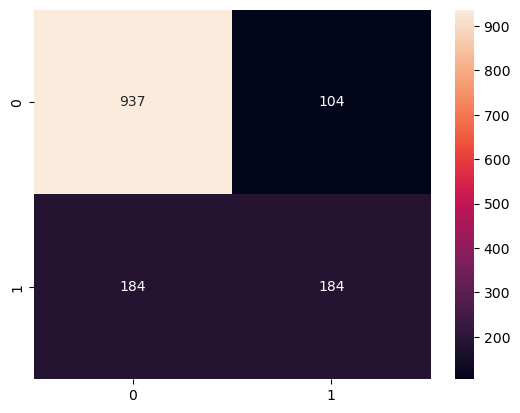

In [54]:
# evaluate model performance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# plot confusion matrix
import seaborn as sns

# predict test set results
y_pred = classifier.predict(X_test)

# evaluate model performance
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


In [ ]:
# 2. K-Nearest Neighbors (K-NN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print('Accuracy: ', KNN.score(X_test, y_test))
print( recall_score(y_test, y_pred))
print( precision_score(y_test, y_pred))
print( f1_score(y_test, y_pred))


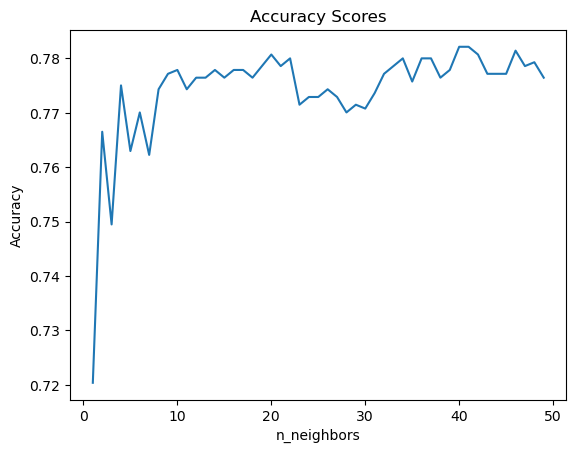

In [55]:
# 2. K-Nearest Neighbors (K-NN)
from sklearn.neighbors import KNeighborsClassifier

scores = []
for n in range(1, 50):
    classifier = KNeighborsClassifier(n_neighbors = n, metric = 'minkowski', p = 2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    # print('n_neighbors: ', n)
    # print('Accuracy: ', classifier.score(X_test, y_test))
    scores.append(classifier.score(X_test, y_test))

# plot accuracy scores
plt.plot(range(1, 50), scores)
plt.title('Accuracy Scores')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


In [56]:
# random forest
from sklearn.ensemble import RandomForestClassifier

rfscores = []
# create model
for n in range(10, 550, 10):
    classifier = RandomForestClassifier(n_estimators=n, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    # print('n_estimators: ', n)
    # print('Accuracy: ', classifier.score(X_test, y_test))
    rfscores.append(classifier.score(X_test, y_test))

# plot accuracy scores
plt.plot(range(10, 550, 10), rfscores)
plt.title('Accuracy Scores')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()


KeyboardInterrupt: 

Accuracy:  0.7835344215755855


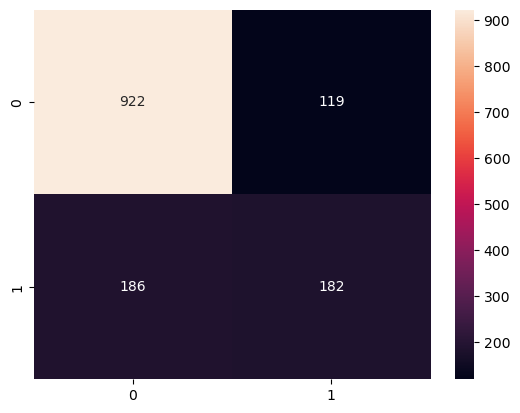

In [ ]:
# final model   
classifier = RandomForestClassifier(n_estimators=500, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy: ', classifier.score(X_test, y_test))

# predict test set results
y_pred = classifier.predict(X_test)

# evaluate model performance
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


Feature ranking:
1. tenure (0.181977)
2. MonthlyCharges (0.173137)
3. TotalCharges (0.164290)
4. Contract (0.083211)
5. PaymentMethod (0.052919)
6. OnlineSecurity (0.044720)
7. TechSupport (0.042421)
8. OnlineBackup (0.029250)
9. gender (0.027505)
10. InternetService (0.025047)
11. PaperlessBilling (0.024796)
12. DeviceProtection (0.023469)
13. MultipleLines (0.023224)
14. Partner (0.022658)
15. SeniorCitizen (0.021313)
16. Dependents (0.019308)
17. StreamingTV (0.017772)
18. StreamingMovies (0.017764)
19. PhoneService (0.005216)


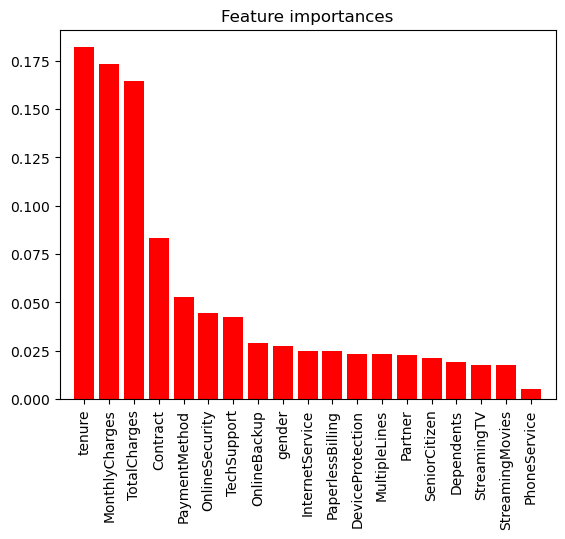

In [ ]:
# feature importance
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
features = dataset.columns[:-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],

         color="r", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
    

In [ ]:
# get the first 5 most important features
features[indices[:5]]

# get from original dataset
dataset[features[indices[:5]]].head()

# preprocess data
# encode categorical data
from sklearn.preprocessing import LabelEncoder

# scale features with more than 5 unique values
from sklearn.preprocessing import MinMaxScaler

# split dataset into features and target
from sklearn.model_selection import train_test_split

# evaluate model performance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


,tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod
0,1,29.85,0.383614,0,2
1,34,56.95,0.224502,1,3
2,2,53.85,0.024043,0,3
3,45,42.30,0.214395,1,0
4,2,70.70,0.141654,0,2


In [ ]:
# encode categorical data
from sklearn.preprocessing import LabelEncoder

# scale features with more than 5 unique values
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
le = LabelEncoder()


# encode object type columns
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        dataset[col] = le.fit_transform(dataset[col])
        # SCALING
        if dataset[col].nunique() > 5:
            dataset[col] = mm.fit_transform(dataset[col].values.reshape(-1,1))
                

# confirm encoding by checking types
if col in dataset.columns:
    if dataset[col].dtype != 'object':
        print('All columns are encoded')

# split dataset into features and target
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

All columns are encoded


Accuracy:  0.78708303761533


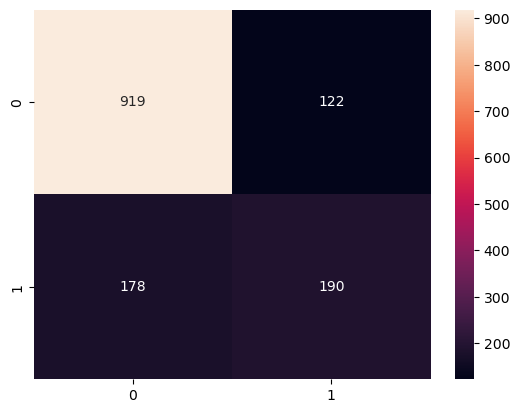

In [ ]:
# random forest gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

# create model
classifier = GradientBoostingClassifier(n_estimators=400, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy: ', classifier.score(X_test, y_test))

# predict test set results
y_pred = classifier.predict(X_test)

# evaluate model performance
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
# do random forest gradient boosting with grid search
from sklearn.model_selection import GridSearchCV

# create model
classifier = GradientBoostingClassifier(random_state=0)
# create grid
grid = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}
# create grid search
grid_search = GridSearchCV(estimator=classifier, param_grid=grid, cv=5, n_jobs=-1)
# fit grid search
grid_search.fit(X_train, y_train)
# get best parameters
best_parameters = grid_search.best_params_
print(best_parameters)
    

{'n_estimators': 100}


Accuracy:  0.7920511000709723


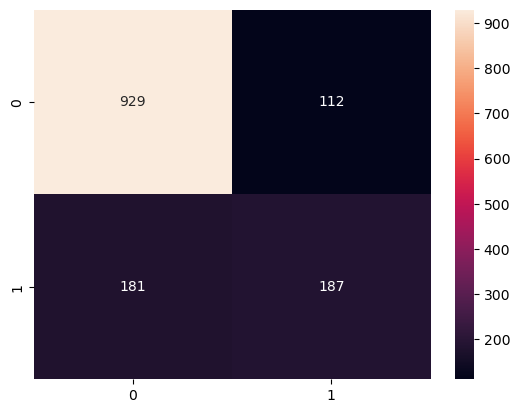

In [ ]:
# create model
classifier = GradientBoostingClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Accuracy: ', classifier.score(X_test, y_test))

# evaluate model performance
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.show()



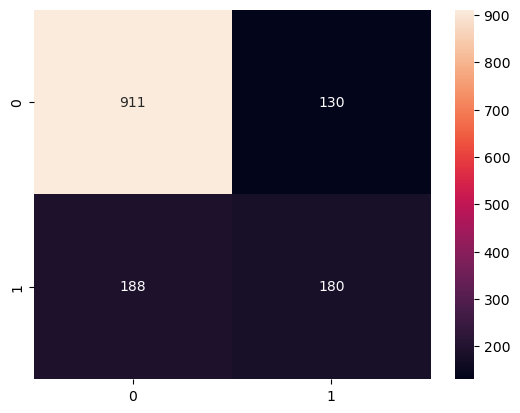

In [ ]:
# xgboost
from xgboost import XGBClassifier

# create model
classifier = XGBClassifier(n_estimators=400, random_state=0)
classifier.fit(X_train, y_train)

# predict test set results
y_pred = classifier.predict(X_test)

# evaluate model performance
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
